In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_data_dictionary():
    
    data_dictionary = open("nerdy_data_dictionary.txt")

    lines = data_dictionary.readlines()
    
    for line in lines:
        print(line)

In [3]:
nerdy_data = pd.read_csv("nerdy_data.csv", delimiter='\t')

X = nerdy_data.loc[:, [column for column in nerdy_data.columns if 'Q' in column]]
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scaled = min_max_scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled)
y = nerdy_data.nerdy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
model = LinearRegression(fit_intercept=True).fit(X_train, y_train)

# summarize feature importance

weights = model.coef_

feature = []
weight = []

for i, v in enumerate(weights):
    feature.append('Q' + str((int(i) + 1)))
    weight.append(f'{v.round(5)}')
    
df = pd.DataFrame({'feature': feature,
                   'weight': weight}).sort_values(by='weight', ascending=False).set_index('feature')

df

,weight
feature,
Q6,0.19598
Q1,0.14447
Q15,0.12747
Q2,0.09262
Q26,0.07979
Q14,0.0725
Q3,0.07171
Q11,0.06644
Q18,0.06024


In [5]:
y_pred = model.predict(X_test)

print('  R2:', r2_score(y_test, y_pred).round(3), '\n'
      ' MSE:', mean_squared_error(y_test, y_pred).round(3), '\n'
      'RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)).round(3))

  R2: 0.329 
 MSE: 1.369 
RMSE: 1.17


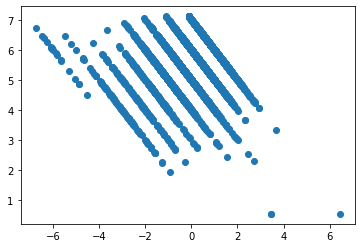

In [6]:
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)

plt.show()

In [7]:
model.score(X_test, y_test).round(3)

0.329

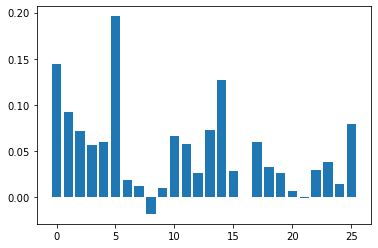

In [8]:
# plot model coefficients

plt.bar([x for x in range(len(weights))], weights)
plt.show()

In [9]:
# add constant to predictor variables
X_train = sm.add_constant(X_train)

# fit linear regression model
model = sm.OLS(y_train, X_train).fit()

# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nerdy   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     361.8
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:42:05   Log-Likelihood:                -31915.
No. Observations:               20180   AIC:                         6.388e+04
Df Residuals:                   20153   BIC:                         6.410e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5505      0.060      9.108      0.000       0.432       0.669
Q1             0.1445      0.009     15.345      0.000       0.126       0.163
Q2             0.0926      0.008     11.115      0.000       0.076       0.109
Q3             0.0717      0.009      7.553      0.000       0.053       0.090
Q4             0.0569      0.008      6.770      0.000       0.040       0.073
Q5             0.0599      0.009      7.040      0.000       0.043       0.077
Q6             0.1960      0.009     22.803      0.000       0.179       0.213
Q7             0.0193      0.010      2.002      0.045       0.000       0.038
Q8             0.0128      0.008      1.660      0.097      -0.002       0.028
Q9            -0.0179      0.009     -1.938      0.053      -0.036       0.000
Q10            0.0097      0.009      1.112      0.266      -0.007       0.027
Q11            0.0664      0.007      9.694      0.000       0.053       0.080
Q12            0.0574      0.008      6.835      0.000       0.041       0.074
Q13            0.0265      0.008      3.263      0.001       0.011       0.042
Q14            0.0725      0.008      9.059      0.000       0.057       0.088
Q15            0.1275      0.006     20.459      0.000       0.115       0.140
Q16            0.0283      0.007      4.038      0.000       0.015       0.042
Q17            0.0002      0.009      0.025      0.980      -0.018       0.019
Q18            0.0602      0.007      9.016      0.000       0.047       0.073
Q19            0.0324      0.007      4.714      0.000       0.019       0.046
Q20            0.0267      0.008      3.243      0.001       0.011       0.043
Q21            0.0074      0.006      1.292      0.196      -0.004       0.019
Q22           -0.0011      0.007     -0.165      0.869      -0.015       0.012
Q23            0.0297      0.007      3.995      0.000       0.015       0.044
Q24            0.0388      0.010      3.704      0.000       0.018       0.059
Q25            0.0141      0.007      1.987      0.047       0.000       0.028
Q26            0.0798      0.010      8.208      0.000       0.061       0.099
==============================================================================
Omnibus:                     3844.552   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9910.871
Skew:                          -1.044   Prob(JB):                         0.00
Kurtosis:                       5.726   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print('  R2:', model.rsquared.round(3), '\n'
      ' MSE:', model.mse_resid.round(3), '\n'
      'RMSE:', np.sqrt(model.mse_resid).round(3))

  R2: 0.318 
 MSE: 1.386 
RMSE: 1.177


In [11]:
get_data_dictionary()

This data was collected through an interactive online test, the Nerdy Personality Attributes Scale

http://openpsychometrics.org/tests/NPAS/development/



Data collection occured December 2015 - December 2018.



The following items were rated on a five point scale where 1=Disagree, 3=Neutral and 5=Agree.





Q1	I am interested in science.

Q2	I was in advanced classes.

Q3	I like to play RPGs. (Ex. D&D)

Q4	My appearance is not as important as my intelligence.

Q5	I collect books.

Q6	I prefer academic success to social success.

Q7	I watch science related shows.

Q8	I spend recreational time researching topics others might find dry or overly rigorous.

Q9	I like science fiction.

Q10	I would rather read a book than go to a party.

Q11	I am more comfortable with my hobbies than I am with other people.		

Q12	I spend more time at the library than any other public place.

Q13	I would describe my smarts as bookish.

Q14	I like to read technology news reports.

Q15	I have started writin

In [12]:
my_answers = [1, #const
              5, #Q1
              5, #Q2
              1, #Q3
              2, #Q4
              5, #Q5
              2, #Q6
              5, #Q7
              2, #Q8
              3, #Q9
              3, #Q10
              1, #Q11
              1, #Q12
              4, #Q13
              5, #Q14
              1, #Q15
              5, #Q16
              1, #Q17
              4, #Q18
              5, #Q19
              3, #Q20
              1, #Q21
              4, #Q22
              5, #Q23
              3, #Q24
              1, #Q25
              4] #Q26

prediction = model.predict(my_answers)

round(prediction[0])

5.0

In [13]:
model = sm.formula.ols(formula='y_train ~ X_train',
                       data = X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     361.8
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:42:05   Log-Likelihood:                -31915.
No. Observations:               20180   AIC:                         6.388e+04
Df Residuals:                   20153   BIC:                         6.410e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.418e+10   5.76e+10      0.593      0.553   -7.87e+10    1.47e+11
X_train[0]  -3.418e+10   5.76e+10     -0.593      0.553   -1.47e+11    7.87e+10
X_train[1]      0.1445      0.009     15.345      0.000       0.126       0.163
X_train[2]      0.0926      0.008     11.118      0.000       0.076       0.109
X_train[3]      0.0717      0.009      7.549      0.000       0.053       0.090
X_train[4]      0.0569      0.008      6.773      0.000       0.040       0.073
X_train[5]      0.0599      0.009      7.037      0.000       0.043       0.077
X_train[6]      0.1960      0.009     22.808      0.000       0.179       0.213
X_train[7]      0.0193      0.010      1.998      0.046       0.000       0.038
X_train[8]      0.0128      0.008      1.656      0.098      -0.002       0.028
X_train[9]     -0.0178      0.009     -1.930      0.054      -0.036       0.000
X_train[10]     0.0096      0.009      1.107      0.268      -0.007       0.027
X_train[11]     0.0664      0.007      9.694      0.000       0.053       0.080
X_train[12]     0.0573      0.008      6.831      0.000       0.041       0.074
X_train[13]     0.0265      0.008      3.262      0.001       0.011       0.042
X_train[14]     0.0725      0.008      9.054      0.000       0.057       0.088
X_train[15]     0.1274      0.006     20.456      0.000       0.115       0.140
X_train[16]     0.0284      0.007      4.044      0.000       0.015       0.042
X_train[17]     0.0003      0.009      0.027      0.979      -0.018       0.019
X_train[18]     0.0602      0.007      9.013      0.000       0.047       0.073
X_train[19]     0.0324      0.007      4.715      0.000       0.019       0.046
X_train[20]     0.0267      0.008      3.242      0.001       0.011       0.043
X_train[21]     0.0074      0.006      1.294      0.196      -0.004       0.019
X_train[22]    -0.0011      0.007     -0.167      0.867      -0.015       0.012
X_train[23]     0.0297      0.007      3.991      0.000       0.015       0.044
X_train[24]     0.0388      0.010      3.704      0.000       0.018       0.059
X_train[25]     0.0141      0.007      1.984      0.047       0.000       0.028
X_train[26]     0.0799      0.010      8.216      0.000       0.061       0.099
==============================================================================
Omnibus:                     3844.528   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9910.745
Skew:                          -1.044   Prob(JB):                         0.00
Kurtosis:                       5.726   Cond. No.                     1.89e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue i

In [14]:
print('  R2:', model.rsquared.round(3), '\n'
      ' MSE:', model.mse_resid.round(3), '\n'
      'RMSE:', np.sqrt(model.mse_resid).round(3))

  R2: 0.318 
 MSE: 1.386 
RMSE: 1.177


<AxesSubplot:>

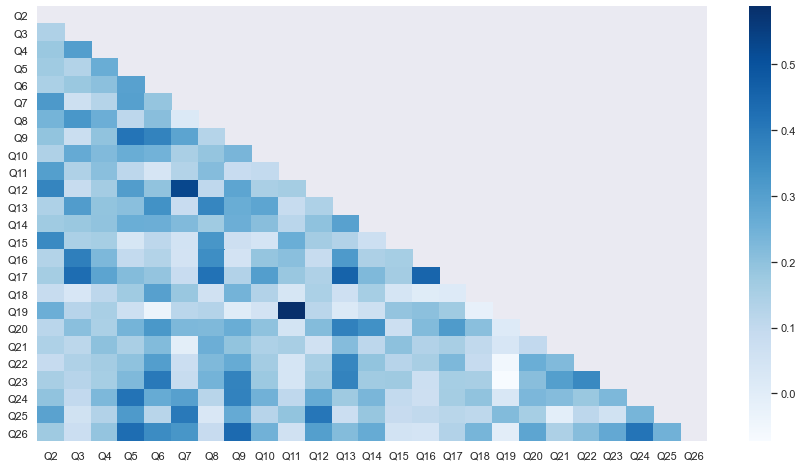

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
corr = X.corr().iloc[1:, 1:]
mask = np.triu(corr)
sns.heatmap(corr, cmap="Blues", mask=mask)

In [16]:
df = pd.DataFrame({})

df["feature"] = X_train.columns
df["VIF"] = [vif(X_train.values, i) for i in range(len(X_train.columns))]

In [17]:
df = df[1:].sort_values(by='VIF', ascending=False)

In [18]:
df[df.VIF > df.VIF.mean()].set_index('feature')

,VIF
feature,
Q17,1.733766
Q13,1.708256
Q11,1.699299
Q19,1.664961
Q7,1.628933
Q12,1.628367
Q1,1.603570
Q9,1.584258
Q4,1.566816


In [19]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.418e+10,5.76e+10,0.593,0.553,-7.87e+10,1.47e+11
X_train[0],-3.418e+10,5.76e+10,-0.593,0.553,-1.47e+11,7.87e+10
X_train[1],0.1445,0.009,15.345,0.000,0.126,0.163
X_train[2],0.0926,0.008,11.118,0.000,0.076,0.109
X_train[3],0.0717,0.009,7.549,0.000,0.053,0.090
X_train[4],0.0569,0.008,6.773,0.000,0.040,0.073
X_train[5],0.0599,0.009,7.037,0.000,0.043,0.077
X_train[6],0.1960,0.009,22.808,0.000,0.179,0.213
X_train[7],0.0193,0.010,1.998,0.046,0.000,0.038
X_train[8],0.0128,0.008,1.656,0.098,-0.002,0.028


<AxesSubplot:xlabel='Q1', ylabel='nerdy'>

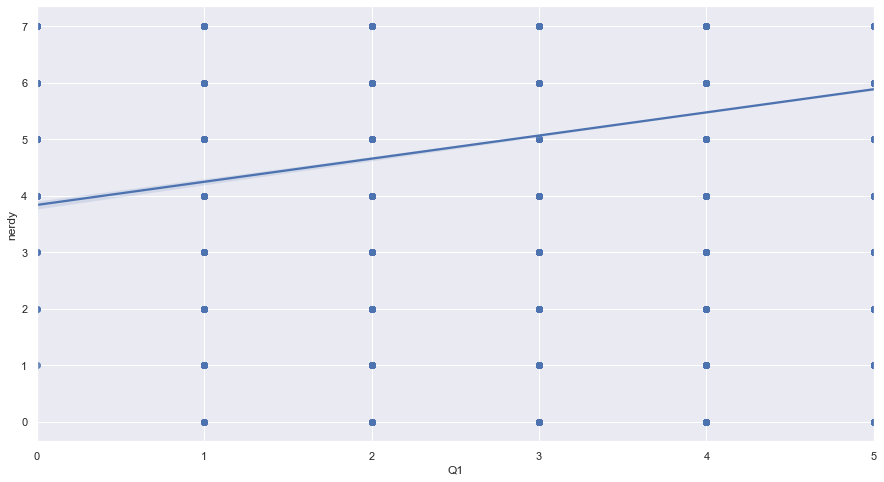

In [20]:
sns.regplot(nerdy_data.Q1, nerdy_data.nerdy)

##### Hopefully you can see more clearly how ill-suited this workflow was to the discrete survey response values!